In [1]:
%load_ext autoreload
%autoreload 2

# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [11]:
from birdcall_distribution.data import prepare_dataframe

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=3,
)

varying_intercept_model


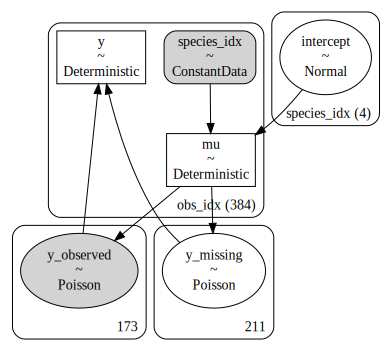

digraph {
	subgraph "clusterobs_idx (384)" {
		mu [label="mu
~
Deterministic" shape=box]
		y [label="y
~
Deterministic" shape=box]
		species_idx [label="species_idx
~
ConstantData" shape=box style="rounded, filled"]
		label="obs_idx (384)" labeljust=r labelloc=b style=rounded
	}
	subgraph "clusterspecies_idx (4)" {
		intercept [label="intercept
~
Normal" shape=ellipse]
		label="species_idx (4)" labeljust=r labelloc=b style=rounded
	}
	subgraph cluster211 {
		y_missing [label="y_missing
~
Poisson" shape=ellipse]
		label=211 labeljust=r labelloc=b style=rounded
	}
	subgraph cluster173 {
		y_observed [label="y_observed
~
Poisson" shape=ellipse style=filled]
		label=173 labeljust=r labelloc=b style=rounded
	}
	intercept -> mu
	species_idx -> mu
	mu -> y_missing
	mu -> y_observed
	y_missing -> y
	y_observed -> y
}

varying_intercept_varying_covariate_car_model


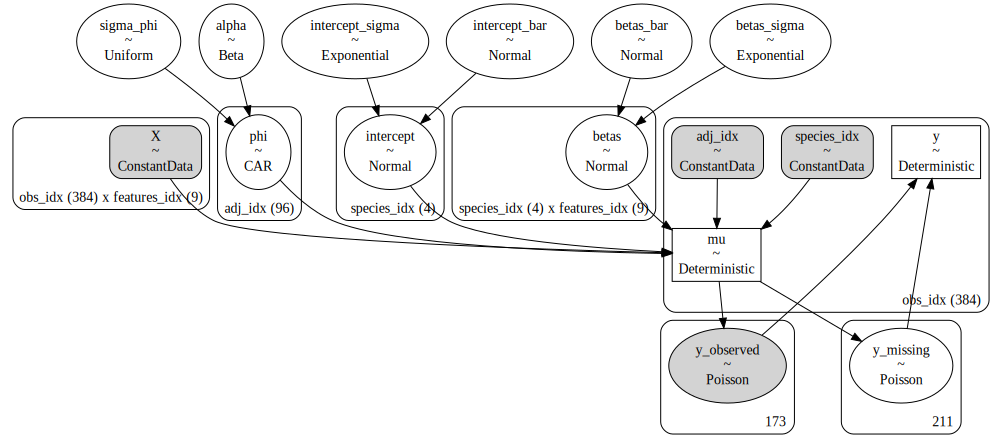

digraph {
	subgraph "clusterobs_idx (384)" {
		mu [label="mu
~
Deterministic" shape=box]
		y [label="y
~
Deterministic" shape=box]
		species_idx [label="species_idx
~
ConstantData" shape=box style="rounded, filled"]
		adj_idx [label="adj_idx
~
ConstantData" shape=box style="rounded, filled"]
		label="obs_idx (384)" labeljust=r labelloc=b style=rounded
	}
	subgraph "clusterobs_idx (384) x features_idx (9)" {
		X [label="X
~
ConstantData" shape=box style="rounded, filled"]
		label="obs_idx (384) x features_idx (9)" labeljust=r labelloc=b style=rounded
	}
	sigma_phi [label="sigma_phi
~
Uniform" shape=ellipse]
	intercept_sigma [label="intercept_sigma
~
Exponential" shape=ellipse]
	betas_bar [label="betas_bar
~
Normal" shape=ellipse]
	betas_sigma [label="betas_sigma
~
Exponential" shape=ellipse]
	intercept_bar [label="intercept_bar
~
Normal" shape=ellipse]
	alpha [label="alpha
~
Beta" shape=ellipse]
	subgraph "clusteradj_idx (96)" {
		phi [label="phi
~
CAR" shape=ellipse]
		label="adj_idx (

In [10]:
from birdcall_distribution import model
import pymc as pm
import arviz as az

# display function
from IPython.display import display

models = {
    "varying_intercept_model": model.make_varying_intercept_model,
    "varying_intercept_varying_covariate_car_model": model.make_varying_intercept_varying_covariate_car_model,
}

# test that all the models are dimensionally correct
for name, func in models.items():
    print(name)
    m = func(prep_df, W)
    # graphviz
    display(pm.model_to_graphviz(m))
    print(pm.model_to_graphviz(m))